In [20]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import operator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [18]:
# Function goal is to determine the right number of clusters
# Runs algorithms with different numbers of clusters and calculates silhouette coefficient
# Returns the number of clusters that leads to the highest silhouette coefficient
def get_num_clust(feat_mat):
    silhouettes = {}
    for k in range(2,11):
        labels = clust_agg(feat_mat,k)
        avg_score = silhouette_score(feat_mat, labels)
        silhouettes[str(k)] = avg_score
    num_clust = int(max(silhouettes.items(), key=operator.itemgetter(1))[0])
    return num_clust

In [6]:
# Function runs Agglomerative Clustering on a given deature matrix using a specified number of clusters
# Retruns the label for each sample
def clust_agg(feat_mat, num_clust):
    labels = AgglomerativeClustering(n_clusters=num_clust).fit_predict(feat_mat)
    return labels

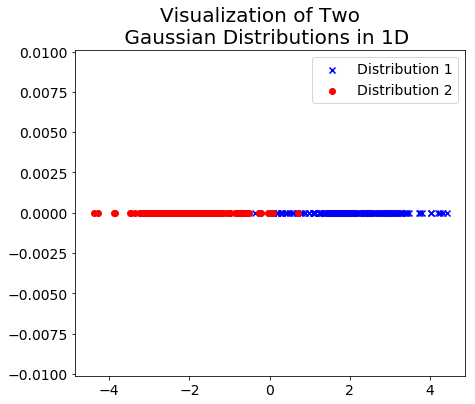

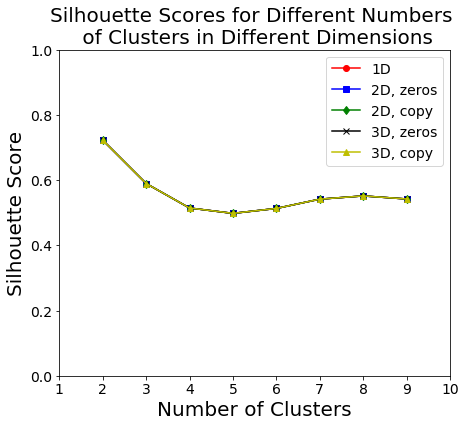

In [54]:
# Formatting figure
plt.rcParams.update({"figure.figsize":(7, 6)})
plt.rcParams.update({"xtick.labelsize":14,"ytick.labelsize":14})

mean1 = 2
mean2 = -mean1

# Making first 1D Gaussian and plotting
mean = mean1
var = 1
a = np.random.normal(mean, var, 150).T
fig = plt.figure()
c1 = plt.scatter(a,np.zeros(150),c='b',marker='x')
fig.suptitle("Visualization of Two \n Gaussian Distributions in 1D", fontsize=20)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("z", fontsize=18)

# Making second 1D Gaussian and plotting
mean = mean2
var = 1
x = np.random.normal(mean, var, 150).T
c2 = plt.scatter(x,np.zeros(150),c='r',marker='o')

plt.legend([c1, c2], ['Distribution 1', 'Distribution 2'], fontsize=14)

# Making a feature matrix from the distributions
c = np.concatenate([[a, x]]).reshape(1,300)
fm = np.concatenate([c]).transpose()

# Determining silhouette score for 2-9 clusters in 1D
silhouettes = np.empty([6, 8])
for k in range(2, 10):
    labels = clust_agg(fm, k)
    silhouettes[0,k-2] = silhouette_score(fm, labels)
    
# Moving to 2D, zeros
fm = np.concatenate([c,np.zeros((1,300))]).transpose()
for k in range(2, 10):
    labels = clust_agg(fm, k)
    silhouettes[1,k-2] = silhouette_score(fm, labels)
    
# Moving to 2D, copy
fm = np.concatenate([c,c]).transpose()
for k in range(2, 10):
    labels = clust_agg(fm, k)
    silhouettes[2,k-2] = silhouette_score(fm, labels)
    
# Moving to 3D, zeros
fm = np.concatenate([c,np.zeros((1,300)),np.zeros((1,300))]).transpose()
for k in range(2, 10):
    labels = clust_agg(fm, k)
    silhouettes[3,k-2] = silhouette_score(fm, labels)
    
# Moving to 3D, copy
fm = np.concatenate([c,c,c]).transpose()
for k in range(2, 10):
    labels = clust_agg(fm, k)
    silhouettes[4,k-2] = silhouette_score(fm, labels)
    

# Plotting silhouette scores
fig = plt.figure()
plt.plot([2,3,4,5,6,7,8,9], silhouettes[0,:], 'ro', label='1D', ls='-')
plt.plot([2,3,4,5,6,7,8,9], silhouettes[1,:], 'bs', label='2D, zeros', ls='-')
plt.plot([2,3,4,5,6,7,8,9], silhouettes[2,:], 'gd', label='2D, copy', ls='-')
plt.plot([2,3,4,5,6,7,8,9], silhouettes[3,:], 'kx', label='3D, zeros', ls='-')
plt.plot([2,3,4,5,6,7,8,9], silhouettes[4,:], 'y^', label='3D, copy', ls='-')
plt.axis([1, 10, 0, 1])
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.legend(fontsize=14)
plt.title('Silhouette Scores for Different Numbers \n of Clusters in Different Dimensions', fontsize=20)
plt.show()